In [1]:
import argparse
import os
import random
import shutil
import time
import warnings
import os
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torch.nn.functional as F

from torch.utils import data
import random
import numpy as np
from itertools import product
import argparse

from train_f import *
from Dataset import Dataset
#from Models import *
# from Models2 import *
# from Models4 import *
from args import args
from Models import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [13]:
def predict(filenames, model_name, C_model = None, vel = 0, redshift = 0, label = ''):
    dim_out = 1
    dim_in = 1
        
    for i, filename in enumerate(filenames):
        if model_name == 'reg_Incep':
            model = Inception(dim_in, 6, 8, 10, reg = 1).to(device)
            state_dict = torch.load('pretrained/' + filename)
            model.load_state_dict(state_dict)
        elif model_name == 'reg_R2Unet':
            model = R2Unet(dim_in,dim_out,t=3,reg = 1).to(device)         
            state_dict = torch.load('pretrained/' + filename)
            model.load_state_dict(state_dict)
        elif model_name == 'subhalo_r2unet':
            model = R2Unet_subhalo(dim_in,dim_out,t=3,reg = 1).to(device)         
            state_dict = torch.load('pretrained/' + filename)
            model.load_state_dict(state_dict)
        elif model_name == 'R2Unet':
            state_dict_mask = torch.load('pretrained/' + C_model)
            mask_model = R2Unet(dim_in, dim_out, t= 3).to(device)
            mask_model.load_state_dict(state_dict_mask)
            pred_model = R2Unet(dim_in,dim_out,t=3,reg = 1).to(device)
            model = two_phase_conv(mask_model,pred_model)
            state_dict = torch.load('pretrained/' + filename)
            model.load_state_dict(state_dict)
        elif model_name == 'Incep':
            state_dict_mask = torch.load('pretrained/' + C_model)
            mask_model = Inception(dim_in, 6, 8, 10).to(device)
            mask_model.load_state_dict(state_dict_mask)
            pred_model = R2Unet(dim_in,dim_out,t=3,reg = 1).to(device)
            model = two_phase_conv(mask_model,pred_model)
            state_dict = torch.load('pretrained/' + filename)
            model.load_state_dict(state_dict)
        elif model_name == 'subhalo_2phase':
            state_dict_mask = torch.load('pretrained/' + C_model)
            mask_model = Inception(dim_in, 6, 8, 10).to(device)
            mask_model.load_state_dict(state_dict_mask)
            pred_model = R2Unet_subhalo(dim_in,dim_out,t=3,reg = 1).to(device)
            model = two_phase_conv(mask_model,pred_model)
            state_dict = torch.load('pretrained/' + filename)
            model.load_state_dict(state_dict)

        with torch.no_grad():
            for ID in ranges:
                if vel == 1:
                    inp=dark_velo[:,ID[0]:ID[0]+32,ID[1]:ID[1]+32,ID[2]:ID[2]+32]
                    inputs=torch.from_numpy(inp).unsqueeze(dim = 0).to(device).float()
                else:
                    #inp=dark[ID[0]:ID[0]+32,ID[1]:ID[1]+32,ID[2]:ID[2]+32]
                    inp=dark[ID[0]:ID[0]+32,ID[1]:ID[1]+32,ID[2]:ID[2]+32]
                    dark_count=torch.from_numpy(inp).unsqueeze(dim = 0).unsqueeze(dim = 1).to(device).float()
                    sub=subhalo[ID[0]:ID[0]+32,ID[1]:ID[1]+32,ID[2]:ID[2]+32]
                    sub=np.log(sub+1)
                    subhallo_mass=torch.from_numpy(sub).unsqueeze(dim = 0).unsqueeze(dim = 1).to(device).float()
                output = model(dark_count)
                #print(' output.size= ', output.size())
#                 outputs = F.softmax(output, dim=1)
        #     predicted = outputs.max(1, keepdim=True)[1]
                predictions[:,ID[0]:ID[0]+32,ID[1]:ID[1]+32,ID[2]:ID[2]+32]=output.cpu().numpy()[0]
                if (ID[1]==0 and ID[2]==0):
                    print(ID)
                #print(output.cpu().numpy()[0].shape)
        predictions[predictions < 0] = 0
        #np.save('/scratch/ys3202/predictions_' + 'red' + str(redshift) + '_' + filename + '.npy', predictions)
        np.save('/scratch/xz2139/predictions_' + label + '_' + filename + '.npy', predictions)

In [3]:
## modify
normalize = 0  #modify
vel = 0 #modify
redshift = 0  #modify 
tng = 0
if tng == 1:
    dark=np.load('/oldscratch/xz2139/TNG_100_dark.npy')
elif redshift == 0:
    dark=np.load('/oldscratch/xz2139/cosmo_dark/Dark_zeros.npy')
    subhalo = np.load('/oldscratch/xz2139/Fullmass_zeros.npy')
if  normalize:
    dm_mean=5.614541471004486
    dark=(dark-dm_mean)/dm_mean
if vel:
    dark_velo = np.load('/oldscratch/xz2139/Dark_velo_zeros_4.npy')

predictions=np.zeros((1,1024,1024,1024))
data_range = 1024
pos=list(np.arange(0,data_range,32))
ranges=list(product(pos,repeat=3))



In [14]:
model_subhalo = ['regression1.pth']
C_model = 'model_2@6@8@10_80_v0_n0.pth'
predict(model_subhalo, C_model=C_model, model_name = 'Incep', vel = 0, label = '1')

(0, 0, 0)
(32, 0, 0)
(64, 0, 0)
(96, 0, 0)
(128, 0, 0)
(160, 0, 0)
(192, 0, 0)
(224, 0, 0)
(256, 0, 0)
(288, 0, 0)
(320, 0, 0)
(352, 0, 0)
(384, 0, 0)
(416, 0, 0)
(448, 0, 0)
(480, 0, 0)
(512, 0, 0)
(544, 0, 0)
(576, 0, 0)
(608, 0, 0)
(640, 0, 0)
(672, 0, 0)
(704, 0, 0)
(736, 0, 0)
(768, 0, 0)
(800, 0, 0)
(832, 0, 0)
(864, 0, 0)
(896, 0, 0)
(928, 0, 0)
(960, 0, 0)
(992, 0, 0)


In [16]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt


def power_spectrum_np(cube, mean_raw_cube, SubBoxSize):

    nc = cube.shape[2] # define how many cells your box has
    delta = cube/mean_raw_cube - 1.0

    # get P(k) field: explot fft of data that is only real, not complex
    delta_k = np.abs(np.fft.rfftn(delta)) 
    Pk_field =  delta_k**2

    # get 3d array of index integer distances to k = (0, 0, 0)
    dist = np.minimum(np.arange(nc), np.arange(nc,0,-1))
    dist_z = np.arange(nc//2+1)
    dist *= dist
    dist_z *= dist_z
    dist_3d = np.sqrt(dist[:, None, None] + dist[:, None] + dist_z)

    
    ################ NEW #################
    dist_3d  = np.ravel(dist_3d)
    Pk_field = np.ravel(Pk_field)
    
    k_bins = np.arange(nc//2+1)
    k      = 0.5*(k_bins[1:] + k_bins[:-1])*2.0*np.pi/SubBoxSize
    
    Pk     = np.histogram(dist_3d, bins=k_bins, weights=Pk_field)[0]
    Nmodes = np.histogram(dist_3d, bins=k_bins)[0]
    Pk     = (Pk/Nmodes)*(SubBoxSize/nc**2)**3
    
    k = k[1:];  Pk = Pk[1:]
    
    return k, Pk

In [15]:
target=np.load('/oldscratch/xz2139/Full_zeros.npy')
prediction=np.load('/scratch/xz2139/predictions_1_regression1.pth.npy')

In [17]:
pred=prediction[0,448:,448:,448:]
tar=target[448:,448:,448:]

In [18]:
p_k,p_pk0=power_spectrum_np(pred,pred.mean(), 42.1875)
t_k,t_pk0=power_spectrum_np(tar,tar.mean(), 42.1875)

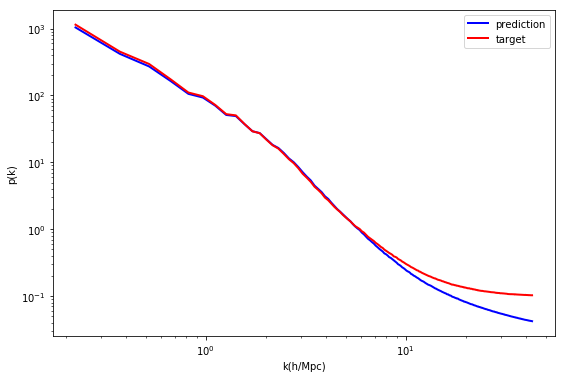

In [20]:
plt.figure(figsize=[9,6])

plt.plot(p_k,p_pk0,label='prediction',linewidth=2,color='b')
plt.plot(t_k,t_pk0,label='target',linewidth=2,color='r')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('k(h/Mpc)')
plt.ylabel('p(k)')
plt.legend()

plt.show()